# Assignment: Making Maps with Cartopy

### 1) Plot data from NARR

NARR is NCEP's [North American Regional Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html), a widely used product for studying the weather and climate of the continental US. The data is available from NOAA's [Earth System Research Laboratory](https://www.esrl.noaa.gov/) via [OPeNDAP](https://en.wikipedia.org/wiki/OPeNDAP), meaing that xarray can open the data "remotely" without downloading a file.

For this problem, you should open this geopential height file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc
    
And this precipitation file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc
    
Your goal is to make a map that looks like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface.

_Hint: examine the dataset variables and attirbutes carefully in order to determine the projection of the data._

![narr_map](cartopy_figures/narr_map.png)

In [1]:

"""
#############################################################################

 Used in class notes from Catopy session +

********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********

############################################################################# 
"""

import pooch
import numpy as np
from matplotlib import pyplot as plt
from numpy import mean
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


%matplotlib inline
%xmode Minimal


Exception reporting mode: Minimal


# Open NOAA Files

In [2]:

geopentialHeight = xr.open_dataset("https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc")

precipitation = xr.open_dataset("https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc")

display(geopentialHeight)

display(precipitation)


/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:            (time: 31, level: 29, y: 277, x: 349, nbnds: 2)
Coordinates:
  * time               (time) datetime64[ns] 2018-10-01 ... 2018-10-31
  * level              (level) float32 1e+03 975.0 950.0 ... 150.0 125.0 100.0
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Dimensions without coordinates: nbnds
Data variables:
    Lambert_Conformal  int32 ...
    time_bnds          (time, nbnds) float64 ...
    hgt                (time, level, y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    ...                              ...
    history:                         created Sat Mar 26 07:07:59 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

<xarray.Dataset>
Dimensions:            (time: 365, y: 277, x: 349, nbnds: 2)
Coordinates:
  * time               (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * y                  (y) float32 0.0 3.246e+04 ... 8.927e+06 8.96e+06
  * x                  (x) float32 0.0 3.246e+04 ... 1.126e+07 1.13e+07
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Dimensions without coordinates: nbnds
Data variables:
    Lambert_Conformal  int32 ...
    time_bnds          (time, nbnds) float64 ...
    apcp               (time, y, x) float32 ...
Attributes: (12/17)
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    ...                              ...
    history:                         created Sat Mar 26 04:56:06 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
geopentialHeight.time;
precipitation.time;

In [4]:
ccrs?

Type:        module
String form: <module 'cartopy.crs' from '/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py'>
File:        /srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py
Docstring:  
The crs module defines Coordinate Reference Systems and the transformations
between them.


In [5]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
ccrs.Robinson()

<Projected CRS: +proj=robin +a=6378137.0 +lon_0=0 +no_defs +type=c ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Robinson
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [7]:
ax.set_extent?

Object `ax.set_extent` not found.


In [8]:
# Link: https://earth-env-data-science.github.io/assignments/cartopy.html

geopentialHeight.variables;

geopentialHeight.Lambert_Conformal;


In [9]:

precipitation.Lambert_Conformal;


# Make a map like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface.

In [10]:
# import cartopy.feature as cfeature
# import numpy as np

# central_lat = 37.5
# central_lon = -96
# extent = [-120, -70, 24, 50.5]

# #central_lon = np.mean(extent[:2])
# #central_lat = np.mean(extent[2:])

# fig = plt.figure(figsize = (12, 6))
# proj = ccrs.AlbersEqualArea(central_lon, central_lat)
# ax = plt.axes(projection = proj)
# ax.set_extent(extent)
# ax.add_feature(cfeature.LAND, facecolor = "brown")
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
# ax.add_feature(cartopy.feature.RIVERS)

# rivers_50m = cfeature.NaturalEarthFeature("physical", "rivers_lake_centerlines", "50m")
# ax.add_feature(rivers_50m, facecolor = "None", edgecolor = "blue")

# # plt.figure(figsize=(12, 6))
# # ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# # ax.set_extent(extent)

# # ax.add_feature(cartopy.feature.OCEAN)
# # ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# # ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
# # ax.add_feature(cartopy.feature.RIVERS)
# # ax.gridlines()

In [11]:

"""********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********"""

attributes = geopentialHeight.Lambert_Conformal.attrs
projec = ccrs.LambertConformal(
    central_longitude = attributes["longitude_of_central_meridian"],
    central_latitude = attributes["latitude_of_projection_origin"],
    false_easting = attributes["false_easting"],
    false_northing = attributes["false_northing"],
    standard_parallels = attributes["standard_parallel"]
)


geoHeight = geopentialHeight.hgt.sel(time = "2018-10-15", level = 500, method = "nearest").load()
rain = precipitation.apcp.sel(time = "2018-10-15", method = "nearest").load()


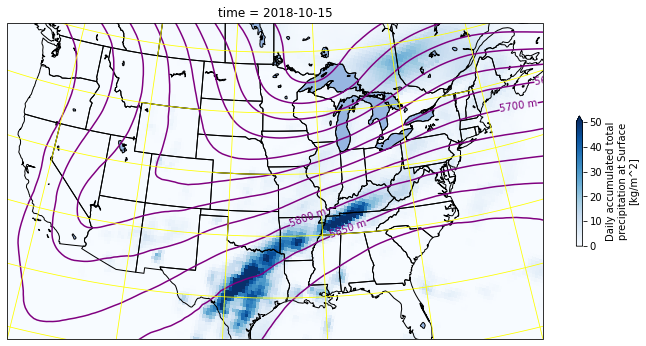

In [12]:
"""
 Used in class notes from Catopy session +

********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********

"""


import cartopy.feature as cfeature
import numpy as np

extent = [-120, -70, 24, 50.5]
central_lat = np.mean(extent[2:])
central_lon = np.mean(extent[:2])
#central_lon = np.mean(extent[:2])
#central_lat = np.mean(extent[2:])
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat))
ax.gridlines(color = "yellow")
ax.set_extent(extent)
ax.add_feature(cfeature.LAND, facecolor = "brown")
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)

con = geoHeight.plot.contour(levels = 20, colors = "purple", transform = projec)
plt.clabel(con, fmt = "%4.0f m")  # Countour line labels
rain.plot(cbar_kwargs = {"shrink": 0.4}, vmax = 50,
         cmap = "Blues", transform = projec);


#rivers_50m = cfeature.NaturalEarthFeature("physical", "rivers_lake_centerlines", "50m")
#ax.add_feature(rivers_50m, facecolor = "None", edgecolor = "blue")

# plt.figure(figsize=(12, 6))
# ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# ax.set_extent(extent)

# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
# ax.add_feature(cartopy.feature.RIVERS)
# ax.gridlines()

### 2) Antarctic Sea Ice

Download this file and then use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017. Again, you will need to explore the file contents in order to determine the correct projection.

    ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
    
You'll have to download this one with `wget`.

In [13]:

!wget ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc

newFile = "ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc"
file = pooch.retrieve(newFile, known_hash = None)


--2021-11-25 07:44:14--  ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
           => ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.23’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/NOAA/G02202_V3/south/daily/2017 ... done.
==> SIZE seaice_conc_daily_sh_f17_20170807_v03r01.nc ... 2682793
==> PASV ... done.    ==> RETR seaice_conc_daily_sh_f17_20170807_v03r01.nc ... done.
Length: 2682793 (2.6M) (unauthoritative)

seaice_conc_daily_s 100%[===================>]   2.56M  5.29MB/s    in 0.5s    

2021-11-25 07:44:15 (5.29 MB/s) - ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.23’ saved [2682793]



In [14]:

ds = xr.open_dataset(file)

ds;


/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'melt_onset_day_seaice_conc_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [15]:
ds.time;

In [16]:
ds.seaice_conc_cdr;

In [17]:
ds.seaice_conc_cdr.isel;

In [18]:
ds.projection;

# Plot the concentration of Antarctic Sea Ice on Aug. 7, 2017

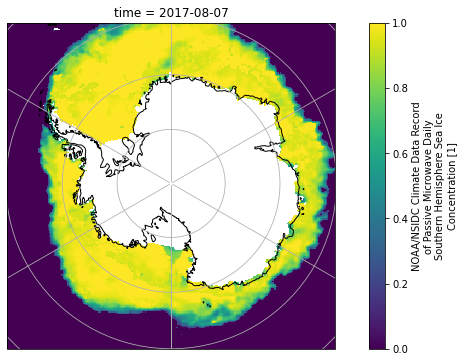

In [19]:

"""********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""

fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection = ccrs.SouthPolarStereo())
extent = [-180, 180, -95, -60]
ax.set_extent(extent, crs = ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
sIce = ds.seaice_conc_cdr
sIce = sIce.where(sIce <= 1)
sIce.plot();


![sea_ice_map](cartopy_figures/sea_ice_map.png)

### 3) Global USGS Earthquakes

Reload the file we explored in homework 5 using pandas

    http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
    
and use the data to recreate this map.

![earthquake_map](cartopy_figures/earthquake_map.png)

In [20]:

"""********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""

link = "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
df = pd.read_csv(link, parse_dates = ["time", "updated"], index_col = ["id"])
magLarge = df.nlargest(50, "mag")


In [21]:
magLarge.describe()
#magLarge.info()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,50.000000,50.000000,50.000000,50.000000,0.0,49.000000,49.000000,50.000000
mean,-6.888984,9.677666,82.377200,6.850000,NaN,31.130612,3.358342,0.910200
std,24.962060,134.239150,146.018618,0.393441,NaN,34.825315,4.153007,0.269114
min,-55.470300,-178.400100,6.430000,6.500000,NaN,9.000000,0.133000,0.150000
25%,-20.506000,-98.844575,16.555000,6.600000,NaN,16.000000,0.828000,0.745000
50%,-11.199250,-43.647050,24.535000,6.700000,NaN,22.000000,2.666000,0.895000
75%,7.757475,154.827725,58.695000,6.900000,NaN,33.000000,3.934000,1.040000
max,51.848600,179.662100,615.420000,8.200000,NaN,230.400000,23.164000,1.390000


Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

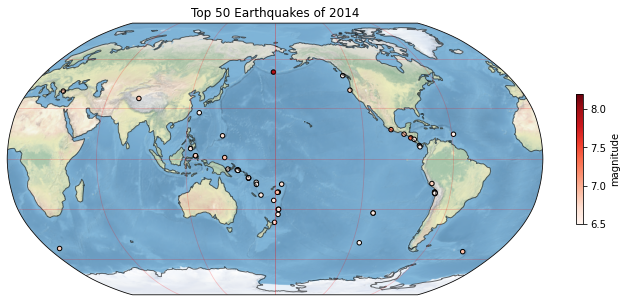

In [22]:


"""********** CROSS REFERENCED SOLUTIONS ON COURSEWORKS ANNOUNCEMENTS **********
"""

fig = plt.figure(figsize = (12, 6))
central_lon = 180
central_lat = 0
ax = plt.axes(projection = ccrs.Robinson(central_lon))
ax.stock_img()
ax.coastlines(alpha = 0.55)
ax.gridlines(alpha = 0.2, color = "red")

magLarge.plot(  kind = "scatter", 
              c = "mag",
              x = "longitude", 
              y = "latitude",
              transform = ccrs.PlateCarree(),
              ax = ax, 
              cmap = 'Reds', 
              edgecolor = "black",
              colorbar = False
             )

sc = ax.collections[0]
fig.colorbar(sc, shrink = 0.4, label = "magnitude")
ax.set_title('Top 50 Earthquakes of 2014')


